In [1]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from State import State
from GenerateDemandMonthly import GenerateDemandMonthly
from GenAlgo import Genetic_Algo_No_Season
from GenAlgo import Genetic_Algo_Seasonal

In [4]:
algorithm_param = {'max_num_iteration': 500,\
                   'population_size':125,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':300}

varbound=np.array([[120, 180],[20,60], [120, 180], [20,60], [120, 180], [20,60], [120, 180]])

def objective_no_season(X):
    return -1 * Genetic_Algo_No_Season(X) #7 parameters

model1=ga(function=objective_no_season,\
        dimension=7,variable_type='int',\
        variable_boundaries=varbound, \
        algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [149.  40. 123.  52. 133.  54. 168.]

 Objective function:
 -9071.278800000002


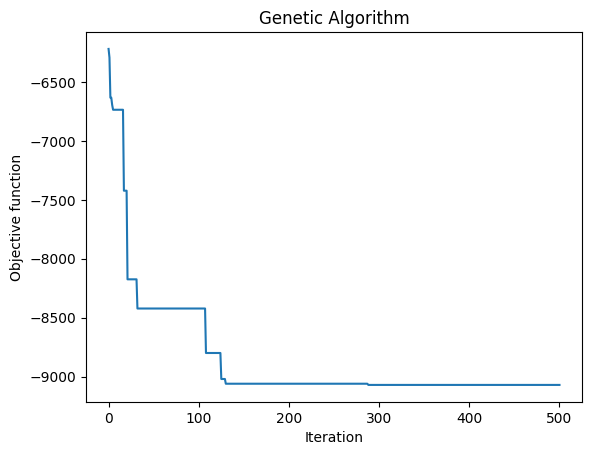

In [5]:
model1.run() 

In [9]:
algorithm_param = {'max_num_iteration': 500,\
                   'population_size':125,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':300}

varbound=np.array([[20, 60],[120, 180]]*36)

def objective_season(X):
    return -1 * Genetic_Algo_Seasonal(X) #72 parameters

model2=ga(function=objective_season,\
        dimension=72,variable_type='int',\
        variable_boundaries=varbound, \
        algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [ 31. 152.  49. 129.  60. 165.  35. 132.  48. 159.  50. 170.  33. 131.
  46. 156.  53. 140.  48. 158.  37. 161.  22. 132.  23. 175.  59. 124.
  56. 120.  36. 138.  47. 143.  29. 121.  37. 122.  33. 144.  41. 127.
  24. 140.  32. 129.  58. 128.  40. 171.  25. 126.  59. 160.  30. 157.
  33. 154.  57. 157.  34. 143.  21. 147.  57. 140.  23. 139.  30. 161.
  41. 156.]

 Objective function:
 -3369.9296000000013


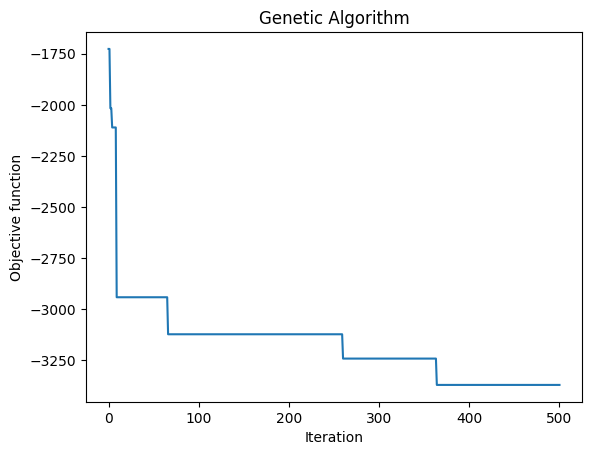

In [10]:
model2.run()